## District Analysis
---
This notebook takes regionalizations from `Redistricting.ipyn` for analysis

First load the libraries and data

In [14]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd

def loaddata(filename, url):
    if not(os.path.isfile(filename+'.geojson')):
        print("Retrieving the data and storing to a file")
    #    req = requests.get(url, filename)
    #    tractdat = req.json()
    #    geojson knows how to read urls, so no need for explicit requests module
        geodat = gpd.read_file(url)
        geodat.to_file(filename + '.geojson', driver='GeoJSON')
        geodat.to_file(filename)
    else:
        geodat = gpd.read_file(filename+'.geojson')
    #convert all to numeric where possible
    geodat = geodat.apply(pd.to_numeric, errors = 'ignore')
    #'pop' is not a good name for population
    if 'pop' in geodat.columns:
        geodat.rename({'pop':'population'}, axis = 'columns', inplace = True)

    return geodat

files = ['tracts', 'counties', 'districts']
urls = ['https://data.colorado.gov/resource/aevh-apr2.geojson?$limit=1300',
        'https://data.colorado.gov/resource/ewkj-ipn7.geojson',
        'https://data.colorado.gov/resource/jz4n-qus2.geojson'] 

geodata = {eachfile: loaddata(eachfile, eachurl) 
           for (eachfile, eachurl) 
           in zip(files, urls)}

First let's look at the census tract regionalization.

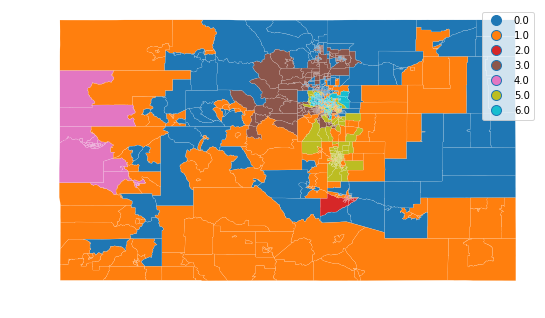

In [15]:
f1, ax1 = plt.subplots(1, figsize=(9,9))
geodata['tracts'].plot(column = 'regindex_azp', 
       categorical = True, 
       linewidth = .1,
       edgecolor = 'white',
       legend = True,
       ax = ax1)
ax1.set_axis_off()

This census tract regionalization optimizes for keeping racial and ethnic groups from being divided.  Let's see populations by district.  

In [16]:
regpops = [sum([geodata['tracts'].population[i] for i in np.where(geodata['tracts'].regindex_azp == j)[0]]) for j in range(7)]
spanpops= [sum([geodata['tracts'].hispanic[i] for i in np.where(geodata['tracts'].regindex_azp == j)[0]]) for j in range(7)]
whitepops = [sum([geodata['tracts'].white_nh[i] for i in np.where(geodata['tracts'].regindex_azp == j)[0]]) for j in range(7)]
ntv= [sum([geodata['tracts'].ntvam_nh[i] for i in np.where(geodata['tracts'].regindex_azp == j)[0]]) for j in range(7)]

Text(0.5, 1.0, 'Hispanic Proportion of each District')

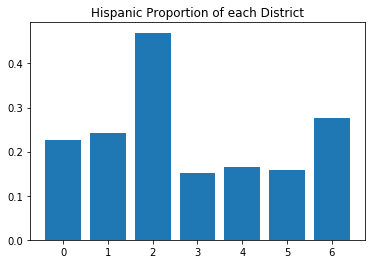

In [17]:
f3, ax3 = plt.subplots(1)
plt.bar(range(7),[i/(j+1) for (i,j) in zip(spanpops, regpops)])
ax3.set_title('Hispanic Proportion of each District')

District 2 has a high proportion of people who identify as hispanic, almost a majority.  In this hypothetical districting map, any candidate would have to address the concerns of this group.   

Text(0.5, 1.0, 'Native American Proportion of each District')

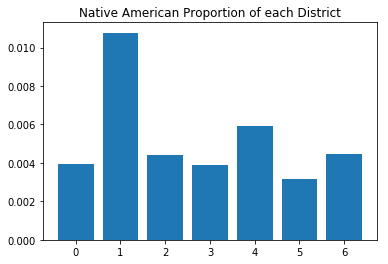

In [18]:
f4, ax4 = plt.subplots(1)
plt.bar(range(7),[i/(j+1) for (i,j) in zip(ntv, regpops)])
ax4.set_title("Native American Proportion of each District")

District 1 tends to maximize the Native American population.  However it is a lower fraction of the total population, and even in this district only comes to 1%.  Even though this regionalization does have a region with high Native population, their voting power is still diluted with other (mostly white) groups'.  

Text(0.5, 1.0, 'Proportion White in each District')

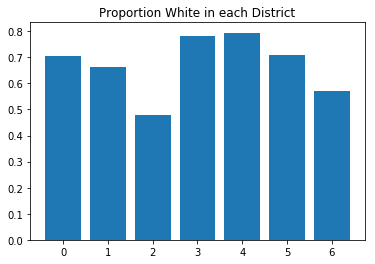

In [19]:
f5, ax5 = plt.subplots(1)
plt.bar(range(7),[i/(j+1) for (i,j) in zip(whitepops, regpops)])
ax5.set_title("Proportion White in each District")

For comparison here is the white population in each district.  Only in District 2 are they less than the majority.  

There is however a problem with this choice of regionalization.  The law provides that each district be equal in population to within 5%.  
> FIVE PERCENT DEVIATION TEST means that the sum of (a) the percent by which the largest 
> district's population exceeds that of the ideal district and (b) the percent by which 
> the smallest district's population falls short of the population of the ideal district, must be less than five percent. In re Reapportionment of Colo. Gen. Ass'y, 647 P.2d 191 (Colo. 1982).

In [20]:
distpop = sum(regpops)/7
print('The largest district is ', max(regpops)/distpop -1, " above average")
print('The smallest district is ', 1-min(regpops)/distpop, " below average")

The largest district is  0.33138208474945086  above average
The smallest district is  0.8985586181157466  below average


Equal populations is part of the goal of the regionalization analysis, but it isn't weighted enough.  